# Installation and import

In [ ]:
# !pip install langid
# !pip install emoji
# !pip install bnlp
# !pip install bnlp_toolkit
# !pip install bltk

In [ ]:
import pandas as pd
import langid
import emoji
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from google.colab import autoviz
from collections import Counter
import re
import csv
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Dataset load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/ML /train.csv")


# Analysis of Dataset

In [ ]:
train_df.head(10)

,summary,genre,Label
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,Fiction,0
3,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,Fiction,0
4,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,Political,3
5,#রকমারি_বইপোকা_রিভিউ_প্রতিযোগিতা।\r\n বইয়ের না...,Fiction,0
6,#রকমারি_বইপোকা_রিভিউ_প্রতিযোগিতা বইঃ বোতল ভূত ...,Childrens-Book,2
7,পাঠকনন্দিত লেখক ডক্টর মুহম্মদ জাফর ইকবাল স্যার...,Thriller,1
8,বই : নাথিং লাস্টস ফরএভার \r\nলেখক : সিডনি শেলড...,Thriller,1
9,একসময় দিনরাত গল্পের বইয়ে মুখ গুঁজে পড়ে থাকতাম।...,Fiction,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887 entries, 0 to 3886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  3886 non-null   object
 1   genre    3887 non-null   object
 2   Label    3887 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 91.2+ KB


In [ ]:
train_df.shape

(3887, 3)

In [ ]:
uni=train_df.genre.unique()
print(f"Categories of Trainset: {uni} and Count: {len(uni)}")

Categories of Trainset: ['Childrens-Book' 'Fiction' 'Political' 'Thriller' 'Science-Fiction'
 'Motivational' 'War'] and Count: 7


# Null Value

In [ ]:
train_df.isna().sum()

summary    1
genre      0
Label      0
dtype: int64

In [ ]:
train_df.dropna(inplace=True)

# Drop Summary length below 5

In [ ]:
train_df['count'] = train_df['summary'].str.split().str.len()
train_df= train_df.loc[train_df['count']>5]

In [ ]:
train_df.shape

(3760, 4)

In [ ]:
train_df.head()

,summary,genre,Label,count
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2,676
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0,67
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,Fiction,0,214
3,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,Fiction,0,380
4,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,Political,3,13


# Dataset pre-processing

In [ ]:

df = pd.DataFrame(train_df['summary'])

def is_english(text):
    language, confidence = langid.classify(text)
    return language == 'en'

df['is_english'] = df['summary'].apply(is_english)

english_count = df['is_english'].sum()
english_indices = df.loc[df['is_english']].summary

print(f"Row indices with fully English text: \n{english_indices}")

Row indices with fully English text: 
36      Average quality story if compare with other fe...
38            When this book will available in your stock
41      this book is anisul haque's first novel and in...
98      This book is a rare piece of property for Bang...
124     It’sa great book. Very informative.  I'm total...
                              ...                        
3671    Not as a my friend of the writer, I would say ...
3780    Almost all the stories written by Dr. Jafor Si...
3784    It is a Great Book of that time Political Parties
3817              A brief journey into Pakistan period...
3863    Himu... himu... himu\r\nWhat can I really say ...
Name: summary, Length: 98, dtype: object


In [ ]:
print(f"Number of cells with fully English text: {english_count}")

Number of cells with fully English text: 98


In [ ]:
train_df['is_english'] = df['is_english']

In [ ]:
train_df.head(7)

,summary,genre,Label,count,is_english
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2,676,False
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0,67,False
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,Fiction,0,214,False
3,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,Fiction,0,380,False
4,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,Political,3,13,False
5,#রকমারি_বইপোকা_রিভিউ_প্রতিযোগিতা।\r\n বইয়ের না...,Fiction,0,205,False
6,#রকমারি_বইপোকা_রিভিউ_প্রতিযোগিতা বইঃ বোতল ভূত ...,Childrens-Book,2,257,False


# Remove Punctuation



1.   Preprocess only in Bangla (Need to discuss what should we do for english)
2.   Did not remove many unnecessary words like (prishta number, mullo, lekhok, taka)



In [ ]:
def remove_punctuations(text, is_english):
    if not is_english:
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F700-\U0001F77F"  # alchemical symbols
                                   u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                                   u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                                   u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                                   u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                                   u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                                   u"\U00002702-\U000027B0"  # Dingbats
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)

        whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
        bangla_fullstop = u"\u0964"
        punctSeq = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
        punc = u"[(),$%^&*+={}\[\]:\"\৷|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"

        text = re.sub(r'(^|\s)@(\w+)', r'\1@user', text)
        text = re.sub(r'\bhttps?://\S+\b', '', text)
        text = whitespace.sub(" ", text).strip()
        text = re.sub(punctSeq, " ", text)
        text = re.sub(bangla_fullstop, " ", text)
        text = re.sub(punc, " ", text)
        text = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]', ' ', text)
        text = text.replace("\\", " ")

    else:
        text = re.sub(r'(^|\s)@(\w+)', r'\1@user', text)
        text = re.sub(r'\bhttps?://\S+\b', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = text.lower()

        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
        text = ' '.join(tokens)

    return text

train_df['summary'] = train_df.apply(lambda row: remove_punctuations(row['summary'], row['is_english']), axis=1)


In [ ]:
train_df['summary'][6]

' রকমারি বইপোকা রিভিউ প্রতিযোগিতা বইঃ বোতল ভূত লেখকঃ হুমায়ূন আহমেদ প্রকাশনীঃ প্রতীক প্রকাশনা সংস্থা প্রচ্ছদঃ ধ্রুব এষ পৃষ্ঠাঃ ৬৪ মুদ্রিত মুল্যঃ ১০০৳  রিভিউঃ  বোতল ভূত  মূলত শিশু কিশোরদের জন্যে রচিত উপন্যাস  মজার ভৌতিক গল্প বললেও ভুল হবে না  বইটি পড়ে আমার মনে হয়েছে তা বড়দেরও আনন্দ দিতে পারে  সুতারাং বড় ছোট সকলে পড়তে পারেন এই বইটি  উপন্যাসে হুমায়ুন আহমেদ উত্তম পুরুষে কাহিনীর বর্ণনা দিয়ে যান  একদিন ক্লাসে এগারো বছর বয়সী লেখাপড়ায় বিমুখ হুমায়ুন আহমেদকে তার বন্ধু মুনির অবাক করে দিয়ে বলল   এই হুমায়ুন  ভূত পুষবি   ভূত পুষবে মানে  ভূত কি কুকুর ছানা নাকি যা চাইলে সহজে পোষা যায়  এমন প্রশ্নগুলো হুমায়ুনের মনে কৌতূহল বাড়াতে থাকে  সাথে সাথে সে রাজি হয়ে রওনা দেয় ভুতের বাচ্চা আনতে  তখন সন্ধ্যাবেলা  গাছপালায় ঢাকা জঙ্গুলে জায়গায় শেওলা ঢাকা দো তলা বাড়িতে তারা উপস্থিত হয়  বাড়ির নাম শান্তিনিকেতন  দরজায় কড়া নাড়তেই বেরিয়ে আসে সন্ন্যাসীর মতন চেহারার একলোক  ঠিক যেন দেখতে অবিকল রবীন্দ্রনাথ ঠাকুরের মতন  পরনে আলখাল্লার মত লম্বা পোশাক  লোকটির আগে অন্য নাম ছিল  এখন অবশ্য সকলে রবিবাবু নামেই ডাকে  কি অদ্ভুত  তাই না  স

# Remove Stopwords

In [ ]:
not_imp_word = ['রকমারি', 'লিঙ্কঃ','রিভিউ','লেখকঃ','প্রকাশনীঃ', 'প্রচ্ছদঃ', 'পৃষ্ঠাঃ', 'মুল্যঃ','রিভিউঃ','রেটিং','বইঃ','মুদ্রিত','প্রকাশনা']


In [ ]:
from collections import Counter
cnt = Counter()
for text in train_df['summary'].values:
    for word in text.split():
        cnt[word] += 1
sorted_cnt = dict(sorted(cnt.items(), key=lambda item: item[1], reverse= True))
sorted_cnt = Counter(sorted_cnt)
print('Total Unique Words:', len(sorted_cnt))

Total Unique Words: 74493


In [ ]:
print('Top 15 frequent words:')
for word, frequency in sorted_cnt.most_common(15):
    print(f'{word}: {frequency}')

Top 15 frequent words:
এক: 7751
একটা: 5108
সাথে: 5105
যায়: 4537
বই: 4366
লেখক: 4313
হয়ে: 4001
কথা: 3474
বইটি: 3353
হয়েছে: 3094
একজন: 2634
পড়ে: 2629
উপন্যাস: 2614
ভালো: 2573
গল্প: 2554


In [ ]:
stop_word_list = (stopwords.words('bengali'))
stop_word_list+=not_imp_word
def stopword_remover(doc):
	tokens = doc.split()
	stop_words = stop_word_list
	tokens = [w for w in tokens if not w in stop_words]
	tokens = ' '.join(tokens)
	return tokens
train_df['summary'] = train_df.summary.apply(stopword_remover)

In [ ]:
from collections import Counter
cnt = Counter()
for text in train_df['summary'].values:
    for word in text.split():
        cnt[word] += 1
sorted_cnt = dict(sorted(cnt.items(), key=lambda item: item[1], reverse= True))
sorted_cnt = Counter(sorted_cnt)
print('Total Unique Words:', len(sorted_cnt))

Total Unique Words: 74490


In [ ]:
print('Top 30 frequent words:')
for word, frequency in sorted_cnt.most_common(30):
    print(f'{word}: {frequency}')

Top 30 frequent words:
এক: 7751
একটা: 5108
সাথে: 5105
যায়: 4537
বই: 4366
লেখক: 4313
হয়ে: 4001
কথা: 3474
বইটি: 3353
হয়েছে: 3094
একজন: 2634
পড়ে: 2629
উপন্যাস: 2614
ভালো: 2573
গল্প: 2554
শেষ: 2419
মানুষ: 2250
নাম: 2232
লেখা: 2218
দিয়ে: 2170
সময়: 1945
বইয়ের: 1917
মানুষের: 1858
কাহিনী: 1740
মত: 1616
চরিত্র: 1611
হিসেবে: 1576
উপন্যাসের: 1575
জীবন: 1551
বড়: 1498


In [ ]:
print('Top 15 least frequent words:')

for word, frequency in sorted_cnt.most_common()[:-16:-1]:
    print(f'{word}: {frequency}')

Top 15 least frequent words:
ভিপি: 1
ডাকসুর: 1
ঊপন্যাস: 1
সাহিত্যকৃতী: 1
পূরনো: 1
আম্বিয়া: 1
আম্বিয়াকে: 1
সার্কাসের: 1
পুথিপাঠ: 1
সুনিখুত: 1
ব্যাবস্থার: 1
ভাঙ্গনের: 1
প্রানচঞ্চল: 1
মুল্যহীনতার: 1
নিত্যনৈমন্ত: 1


In [ ]:
train_df['summary'][6]

'বইপোকা প্রতিযোগিতা বোতল ভূত হুমায়ূন আহমেদ প্রতীক সংস্থা ধ্রুব এষ ৬৪ ১০০৳ বোতল ভূত মূলত শিশু কিশোরদের জন্যে রচিত উপন্যাস মজার ভৌতিক গল্প বললেও ভুল বইটি পড়ে হয়েছে বড়দেরও আনন্দ সুতারাং বড় ছোট সকলে পড়তে বইটি উপন্যাসে হুমায়ুন আহমেদ উত্তম পুরুষে কাহিনীর বর্ণনা দিয়ে একদিন ক্লাসে এগারো বছর বয়সী লেখাপড়ায় বিমুখ হুমায়ুন আহমেদকে বন্ধু মুনির অবাক দিয়ে হুমায়ুন ভূত পুষবি ভূত পুষবে মানে ভূত কুকুর ছানা চাইলে সহজে পোষা যায় প্রশ্নগুলো হুমায়ুনের কৌতূহল বাড়াতে সাথে সাথে রাজি হয়ে রওনা দেয় ভুতের বাচ্চা আনতে সন্ধ্যাবেলা গাছপালায় ঢাকা জঙ্গুলে জায়গায় শেওলা ঢাকা দো তলা বাড়িতে উপস্থিত বাড়ির নাম শান্তিনিকেতন দরজায় কড়া নাড়তেই বেরিয়ে আসে সন্ন্যাসীর মতন চেহারার একলোক অবিকল রবীন্দ্রনাথ ঠাকুরের মতন পরনে আলখাল্লার মত লম্বা পোশাক লোকটির নাম সকলে রবিবাবু নামেই ডাকে অদ্ভুত অদ্ভুত লোকটিই ছোট্ট শিশিতে ভরে দিল ভুতের বাচ্চা ভুতের বাচ্চাকে হুমায়ুন ঘরে এলো নিশ্চয় ইচ্ছে থাক গল্পের মজা নষ্ট চাইনা আপনারাই পড়ে ফেলুন ব্যতিক্রমধর্মী মজার ভৌতিক উপন্যাসটি হুমায়ুন আহমেদের উপন্যাসগুলো বরাবরই সাহিত্যরস সমৃদ্ধ সুখপাঠ্য ছোটোদের জন্যে বোতল ভ

# Data Visualization

<Figure size 1600x1600 with 0 Axes>

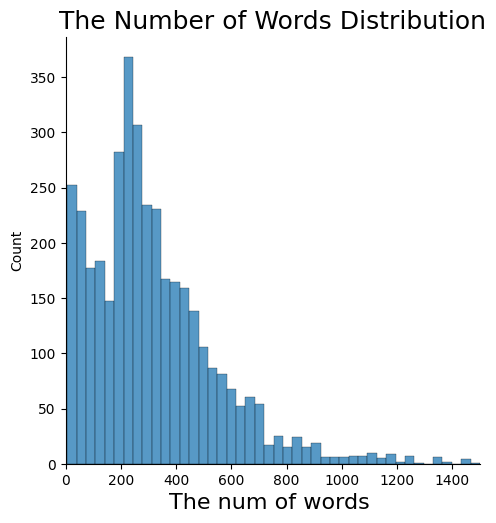

In [ ]:
plt.figure(figsize= (16, 16))

sns.displot(train_df['count'])

plt.xlim(0, 1500)

plt.xlabel('The num of words ', fontsize = 16)
plt.title("The Number of Words Distribution", fontsize = 18)
plt.show()

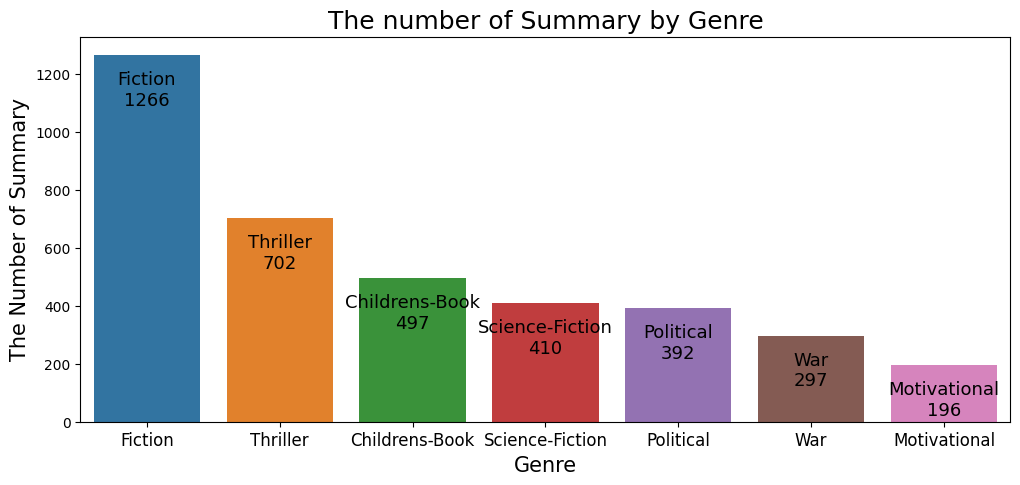

In [ ]:
category_count = train_df['genre'].value_counts()

categories = category_count.index

fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'black' , ha = 'center', va = 'center', textcoords = 'offset points' )

plt.xlabel('Genre', size = 15)

plt.ylabel('The Number of Summary', size= 15)

plt.xticks(size = 12)

plt.title("The number of Summary by Genre" , size = 18)

plt.show()